#### Data set link: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data

#### Load Anime data from CSV file.

In [93]:
import pandas as pd
import numpy as np
# Load dataset
df_ani = pd.read_csv(r'anime.csv')
df_ani.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Filtering text : clean_text, for cleaning text data.

In [94]:
import re
import emoji

def clean_text(text):
    # Remove URLs
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    # Remove emojis
    text = emoji.replace_emoji(text, replace=' ')
    text = re.sub(r'\s+',' ', text)    
    return text

### Load Rating data from csv file.

In [96]:
import pandas as pd
import numpy as np
# Load dataset
df_rating = pd.read_csv(r'rating.csv')
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


#### ==================  Exploratry Data Analysis  ===========================

#### Eliminate inappropriately rating : Some rating are -1 : means user don't provide any rating.

In [97]:
# Convert empty strings to NaN 
df_rating['rating'].replace('', np.nan, inplace=True)
# Remove rows where rating is -1, NaN, or blank 
df_rating_cleaned = df_rating.dropna(subset=['rating']) 
df_rating_cleaned = df_rating_cleaned[df_rating_cleaned['rating'] != -1]
print(f"Rating shape before cleanup: {df_rating.shape}")
print(f"rating after remove rating is -1 or NaN/Null/Empty : {df_rating_cleaned.shape}")

Rating shape before cleanup: (7813737, 3)
rating after remove rating is -1 or NaN/Null/Empty : (6337241, 3)


#### Clean 'name' feature, 

In [98]:
df_ani['name'] = df_ani['name'].apply(clean_text)
print(f"Shape of df_ani : {df_ani.shape}")
unique_df_ani = df_ani.drop_duplicates(subset=['name'])
print(f"After remove duplicates, Shape of unique_df_ani : {unique_df_ani.shape}")

Shape of df_ani : (12294, 7)
After remove duplicates, Shape of unique_df_ani : (12286, 7)


#### Merge the datasets on the 'anime_id' column :: Merged anime and rating data set after cleanup.

In [99]:
# Merge the datasets on the 'anime_id' column
merged_data = pd.merge(df_rating_cleaned, unique_df_ani, on='anime_id', how='inner')
print(merged_data.describe().map("{:.0f}".format))
merged_data.head()

       user_id anime_id rating_x rating_y  members
count  6323076  6323076  6323076  6323071  6323076
mean     36749     8909        8        8   184535
std      21014     8889        2        1   191106
min          1        1        1        2       33
25%      18981     1239        7        7    46712
50%      36820     6211        8        8   117090
75%      54877    14131        9        8   256325
max      73516    34475       10        9  1013917


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


In [100]:
# Convert columns to integers
merged_data['anime_id'] = merged_data['anime_id'].astype(int)
merged_data['user_id'] = merged_data['user_id'].astype(int)
# Verify the data types
print(merged_data.dtypes)

user_id       int32
anime_id      int32
rating_x      int64
name         object
genre        object
type         object
episodes     object
rating_y    float64
members       int64
dtype: object


In [101]:
merged_data[merged_data.duplicated()].shape
anime_all = merged_data.drop_duplicates()
print(f"Dupllicated: {anime_all[anime_all.duplicated()].shape}")

Dupllicated: (0, 9)


### Rename column for better understading : rating_x to user_rating and rating_y to avg_rating.

In [ ]:
anime_all.rename(columns={'rating_x': 'user_rating', 'rating_y': 'avg_rating'}, inplace=True)

In [104]:
anime_all.head(15)

,user_id,anime_id,user_rating,name,genre,type,episodes,avg_rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
5,17,8074,7,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
6,24,8074,7,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
7,27,8074,9,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
8,29,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
9,30,8074,8,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


#### Word cloud for genre.

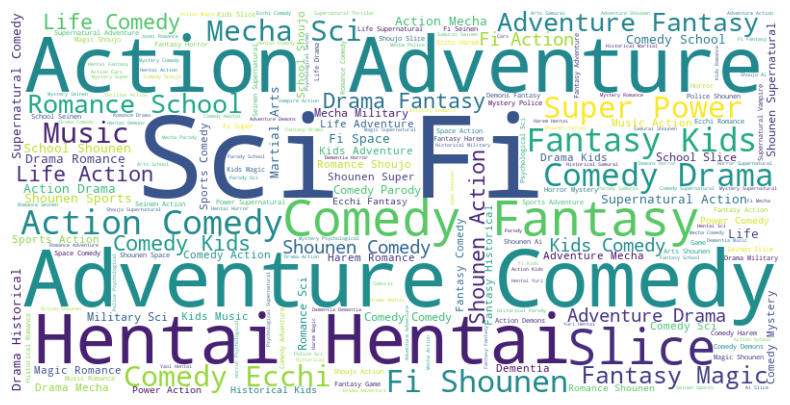

In [172]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all genres into a single string
genres = ' '.join(df_ani['genre'].fillna(''))
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Display distribution by : Rating Avg, Rating users, Type and Total Members.

Text(0.5, 1.0, 'Total Members')

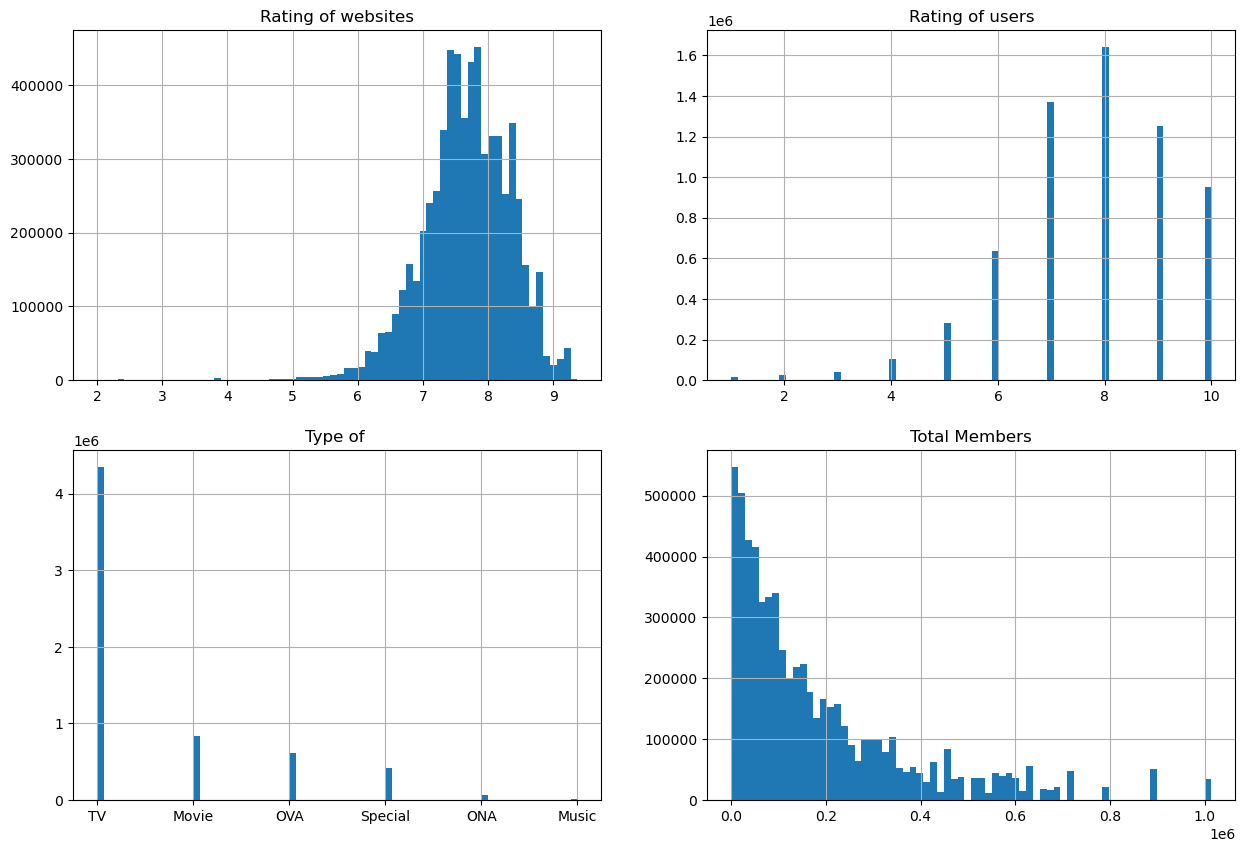

In [158]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
anime_all['avg_rating'].hist(bins=70)
plt.title("Rating of websites")

plt.subplot(2,2,2)
anime_all['user_rating'].hist(bins=70)
plt.title("Rating of users")

plt.subplot(2,2,3)
anime_all['type'].hist(bins=70)
plt.title("Type of ")

plt.subplot(2,2,4)
anime_all['members'].hist(bins=70)
plt.title("Total Members")

#### Top 10 Anime based on members.

Text(0, 0.5, 'Community Size')

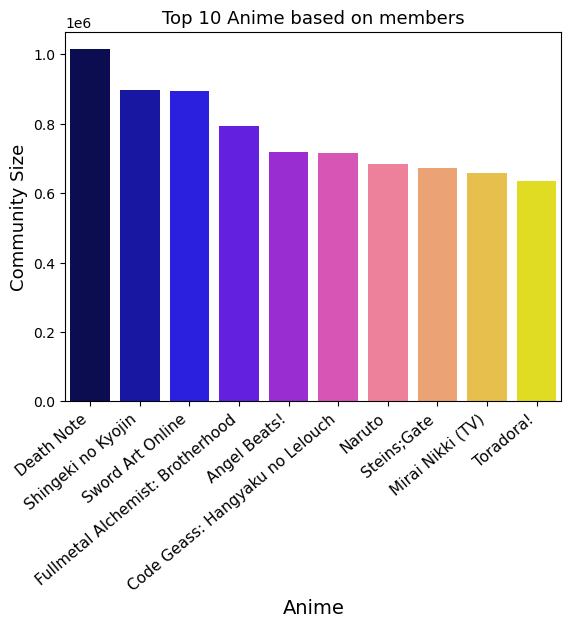

In [170]:
import seaborn as sns
anime_uniques=anime_all.copy()
anime_uniques.drop_duplicates(subset ="name", 
                     keep = 'first', inplace = True)
top10_members=anime_uniques[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="name", y="members", data=top10_members, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 13)
ax.set_xlabel('Anime',fontsize = 14) 
ax.set_ylabel('Community Size', fontsize = 13)

#### Filter based on user_id : User which participate in rating more and equall to 200 times.

In [105]:
anime_GE200 = anime_all.copy()
counts = anime_all['user_id'].value_counts()
anime_GE200 = anime_all[anime_all['user_id'].isin(counts[counts >= 200].index)]
anime_L200 = anime_all[anime_all['user_id'].isin(counts[counts < 200].index)]
print(f"total {len(anime_all)} <==> {len(anime_L200)} + {len(anime_GE200)} <==> {len(anime_L200) + len(anime_GE200)}")

total 6323075 <==> 3160067 + 3163008 <==> 6323075


#### For creating sparse matrix  and finding cosine similarity : Create Pivote table.

In [106]:
anime_pivot=anime_GE200.pivot_table(index='name',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Use k-nearest neighbors (k-NN) algorithm with cosine matrix.

In [108]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

### pivot table into a sparse matrix
anime_matrix = csr_matrix(anime_pivot.values)
### using a k-nearest neighbors (k-NN) algorithm to create a model
### Using cosine Matrix for finding similarity items features.
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
### Fitting the Model
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### Select a random index for 'name' feature, from the anime_pivot

In [114]:
name_index = np.random.choice(anime_pivot.shape[0])
print(f"Index of name :{name_index}")
### returning the Cosine distances and indices of 5 neighbours through KNN 
cosine_distances, indices = model_knn.kneighbors(anime_pivot.iloc[name_index,:].values.reshape(1, -1), n_neighbors = 6)

Index of name :4737


#### cosine_distances values represent the distances between the query point and each of the 6 nearest neighbors found.
'''
Cosine Distance vs. Cosine Similarity:

Cosine similarity measures the cosine of the angle between two vectors, with values ranging from -1 (exactly opposite) to 1 (exactly the same).

Cosine distance is calculated as 1 - cosine similarity. Therefore, a lower cosine distance indicates higher similarity.
'''
#### Display top 5 recommended names.

In [115]:
for i in range(0, len(cosine_distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[name_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], cosine_distances.flatten()[i]))

Recommendations for Kuruneko: Nyaalock Holmes no Bouken:

1: Ashinaga Ojisan, with distance of 0.2928932188134524:
2: Fushigiboshi no☆Futagohime Gyu! Recap, with distance of 0.2928932188134524:
3: Kuruneko: Kurunekobin, with distance of 0.2928932188134524:
4: Gunparade Orchestra OVA, with distance of 0.2928932188134524:
5: Ai to Ken no Camelot: Mangaka Marina Time Slip Jiken, with distance of 0.41165159458544787:


##### TF-IDF apply for 'genere' recommendation.
TF-IDF is based on the Bag of Words (BoW) model, which counts the occurrence of words in a document. However, TF-IDF adjusts for the fact that some words appear more frequently than others.
It does this by: 
Term frequency (TF): The number of times a term appears in a document 
Inverse document frequency (IDF): 
  Weighs down frequent terms and increases the weight of rare terms 
Calculating the TF-IDF score: Multiplying the TF and IDF values together.
##### The higher the TF-IDF score, the more relevant the word is in the document.

#### Create TFidf Matrix for 'genre' feature.

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
unique_df_ani.loc[:, 'genre'] = unique_df_ani['genre'].fillna('')
genres_str = unique_df_ani['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

#### Calculate sigmoid kerenal : 
#### The sigmoid kernel is used to compute the similarity between two data points using the hyperbolic tangent function.

In [124]:
from sklearn.metrics.pairwise import sigmoid_kernel
sigmoid_matrix = sigmoid_kernel(tfv_matrix, tfv_matrix)

### Collect the name indices  : 

In [126]:
name_indices = pd.Series(unique_df_ani.index, index=unique_df_ani['name']).drop_duplicates()

#### Recommendation function: Using sigmoid kernel.

In [129]:
def recommended_name(title, name_indices = name_indices, sigmoid_matrix=sigmoid_matrix):
    # Get the index corresponding to original_title
    idx = name_indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sigmoid_matrix[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': unique_df_ani['name'].iloc[anime_indices].values,
                                 'Rating': unique_df_ani['rating'].iloc[anime_indices].values})

<div>    
    <span style="color: #6abad2; font-size: 18px; font-weight: bold;">Recommendation for 5 samples.</span>
</div>

<div>
    <span style="color: #2E8B57;"> Get random 5 name and applyy the recommended function</span>
</div>
<div>
    <span style="color: #2E8B57;">Recommended name ascending user rating.</span>
</div>

In [143]:
# ANSI escape codes for bold text 
BOLD = '\033[1m' 
END = '\033[0m'
np.random.seed()
random_names = unique_df_ani['name'].sample(5).values
for anime_name in random_names:
    print(f"{BOLD} Recommendation for: {anime_name} {END}")
    result = recommended_name(anime_name)
    print(f"{result}")
    print(f"{BOLD}{'=' * 60}{END}")


 Recommendation for: Peeping Life: Gekijou Original-ban 
                               Anime name  Rating
0            Gochuumon wa Usagi Desu ka??    8.01
1                               Working!!    7.98
2  Jungle wa Itsumo Hare nochi Guu Deluxe    7.95
3                         Chis Sweet Home    7.83
4                               New Game!    7.81
 Recommendation for: Pugyuru 
                          Anime name  Rating
0        Isshuukan Friends. Specials    6.81
1  Mai-Otome Special: Otome no Inori    6.60
2                  Girlfriend (Kari)    6.03
3                           Turnover    5.92
4  Kanojo ga Kanji wo Suki na Riyuu.    5.71
 Recommendation for: Yozakura Quartet: Tsuki ni Naku 
                                          Anime name  Rating
0                                   Zero no Tsukaima    7.62
1              Zero no Tsukaima: Princesses no Rondo    7.60
2                                           Negima!?    7.21
3  Campione!: Matsurowanu Kamigami to Kamigor